<a href="https://colab.research.google.com/github/L3borim/LoL-Match-Prediction-Project-IA2024S1/blob/dev/IA_2024S1_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Predição de Melhor Composição de Campeões do League of Legends***
---

*Siga esse template para entrega do seu artigo/projeto. O código deste notebook precisa ser 100% executável* não podendo, assim, fazer referência a arquivos locais ou privados.

Neste projeto você deve **explorar algumas tecnologias que são o estado da arte da IA e do Aprendizado de Máquina (modelos largos de linguagem - APIs ChatGPT, Gemini, Meta Llama -, modelos neurais profundos - TensorFlow, PyTorch -, aprendizado com imagem, som ou vídeo - OpenCV, OpenPose, Yolo -, modelos pré-treinados - transfer learning -, ou aplicação de modelos em casos reais)**. Em geral são temas que não tratamos em sala, seja pelo tempo, seja pela necessidade de focarmos nos fundamentos. O grupo pode optar por dar continuidade à proposta que apresentou no 1o bimestre, levando em consideração os comentários do professor, ou escolher um outro tema dentro dos mesma premissa explorar novos modelos.

Vocês devem produzir um *artigo*, a exemplo de artigos do *Medium* (\*) ou outros canais semelhantes, para que seu grupo, colegas e leitores do trabalho tenham aqui um ponto de partida para uso da tecnologia/conceito escolhido. Desse modo é importante a linguagem, o trabalho deve, antes de tudo **comunicar**.

Você pode, e é mesmo esperado, que você empregue referências e implementações de outros trabalhos. Mas é importante que você **1. Indique adequadamente as referências**, e **2. Implemente algum diferencial na sua solução**, o que pode ser um conjunto de dados diferente, comparação com outro modelo etc.

<br>

(\*) *Atendendo critérios mínimos, convidarei os dois melhores trabalhos para fazermos uma publicação no Medium.*


In [12]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10375711, Gabriel Marques G. Almeida' #@param {type:"string"}
Aluno2 = '10390123, Leonardo Borim Silva' #@param {type:"string"}
Aluno3 = '10390316, Mateus Yoon' #@param {type:"string"}
Aluno4 = '10390484, Samy Idesis' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo (*Abstract*)**

Este projeto acadêmico tem como objetivo utilizar dados da API da Riot Games para treinar um modelo preditivo capaz de prever o vencedor de uma partida de League of Legends, seja o lado azul (blue) ou o lado vermelho (red). Para isso, utilizamos a API da Riot para obter dados de 888 partidas, todas do ranking mais alto do jogo, o "Challenger". Coletamos informações sobre os campeões escolhidos pelos jogadores em cada partida, tanto do lado azul quanto do lado vermelho, e o resultado final da partida. Com esses dados, treinamos um modelo que pode prever o vencedor de uma nova partida com base nas escolhas dos campeões. (ARRUMAR SAMY E XI)

# **Referencial Teórico**

XI e SAMY
API DA RIOT -> https://developer.riotgames.com/apis

Apresente os principais conceitos da tecnologia ou princípio explorado no seu trabalho (o que é? como funciona? Suas aplicações). Não deixe de indicar referências e incluir ilustrações/esquemas quando necessário. Empregue 2-3 páginas.





Para facilitar a comunicação fica aqui a sugestão (opcional) de incluírem no Referencial Teórico um texto nos seguintes moldes:

> ## **Conceitos Chave**

> Resuma aqui 3-5 palavras chave da tecnologia ou conceito explorado. Por exemplo, se seu trabalho explora-se o conceito de *Deep Learning*, os seguintes iten poderiam ter tratados aqui:

> ### 1. *Função de Ativação*
É uma função, em geral não linear, aplicada à combinação linear das entradas de um neurônio artificial. Exemplos comuns de funções de ativação são a `ReLU`, `Softmax`, $tanh$ e `sigmoid`.

> ### 2. *Backpropagation*
É o algoritmo empregado para atualizar e efetura o treinamento dos pesos de uma rede neural. Após o processamento da rede (*forward*) é empregado o erro entre a saída da rede e a saída desejada para se ajustar os pesos em um processo de retropropagação (no sentido contrário), em que cada camada é ajustada na medida de sua participação no resultado da rede.

> etc.

# **Exemplo de Aplicação**

XI E SAMY (Mano da pra fazer essa predição em sites de apostas de lol KKKKK)
Descreva aqui um pequeno problema que você resolverá aplicando a tecnologia/conceito envolvido. O código/solução não precisa ser original, mas não deixe de dar as referências dessa solução. Lembre-se que o notebook precisa ser 100% executável e, portanto, você não deve empregar arquivos locais da sua máquina.

Empregue aqui um ou dois parágrafos.

# **Implementação**

## Bibliotecas que vão ser utilizadas ao longo da implementação:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Criação do dataset de partidas

Este codigo apresenta como foi feita a coleta de dados usando a API da Riot Games. Colocamos como texto para mostra como foi a coleta e usamos depois um csv para o treinamento pois demora para obter os dados já que a API tem limite no número de requsições.

As céluas seguintes serão puladas da execução pois apenas explicam como foi obtida a tabela de dados e envolvem a questão da demora de excução da API citada anteriormente.


### 1. **Bibliotecas Utilizadas**

In [14]:
if False:
  import requests
  import time

### 2. Chave utilizado para uso da API:

A Chave vence após 24h (é necessario criar uma conta RIOT). Além disso, a chave abaixo é fictícia e para obtenção dos dados foi usada uma chave válida, a qual não foi compartilhada aqui nesse notebook por ser um dado sensível e não pode ser compartilhado de acordo com as políticas da Riot Games.

Para o correto funcionamento do código completo, é necessário usar uma chave válida.

In [15]:
api_key = "RGAPI-abcdefgh-1234-5678--1a2b3c4d5f6g"

### 3. Captura dos IDs das partidas

Essa funçao usa a API para pegar o ID da partidas usando o PUUID do jogador.

In [16]:
if False:
  def get_all_match_ids(puuid, region='americas', total_count=200):
    match_ids = []
    for start in range(0, total_count, 100):
        matches_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count=100&api_key={api_key}"
        matches_response = requests.get(matches_url)
        match_ids.extend(matches_response.json())


        time.sleep(1)
    return match_ids

### 4. Captura dos detalhes das partidas

Essa função utiliza o ID da partida para pegar os detalhes das partidas (Ex. Número de kills, mortes, assistências, nível, etc.), no entanto, vamos pegar apenas quais os 10 campeões que participaram da partida.

In [17]:
if False:
  def get_match_details(match_id, region='americas'):
    match_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"
    while True:
        match_response = requests.get(match_url)
        if match_response.status_code == 200:
            return match_response.json()
        elif match_response.status_code == 429:
            retry_after = int(match_response.headers.get('Retry-After', 1))
            time.sleep(retry_after)
        else:
            match_response.raise_for_status()

### 5. Captura do [PUUID](https://www.riotgames.com/en/DevRel/player-universally-unique-identifiers-and-a-new-security-layer) do jogador

Essa função obtem o PUUID (*Player Universally Unique Identifier*) de um jogador usando seus respectivos RIOT_ID e tag, que são dados públicos.

In [18]:
if False:
  def get_puuid(riot_id, tag_line, region='americas'):
    puuid_url = f"https://{region}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_id}%20/{tag_line}?api_key={api_key}"
    puuid_response = requests.get(puuid_url)


    if puuid_response.status_code != 200:
      raise Exception(f"Erro ao buscar PUUID: {puuid_response.status_code}")

    puuid_data = puuid_response.json()


    if 'puuid' not in puuid_data:
      raise KeyError("'puuid' não encontrado na resposta da API")

    return puuid_data['puuid']

### 6. Lista de jogadores
Estes foram os jogadores utilizados para a captura das partidas e dos campões utilizados nelas. Os seguintes jogadores correspondem ao 5 melhores rankeados das filas competitivas de League of Legends no Brasil.



In [19]:
if False:
  players = [
  ('randal', 'zero1'),
  ('fuuuuuuuu', '99999'),
  ('Dernière danse', 'IMPz'),
  ('frosty', 'KR3'),
  ('Kojima', '2840'),
  ]
  region = 'americas'

### 7. Coleta de dados de partidas para todos os jogadores

In [20]:
if False:
  all_matches_data = []
  for riot_id, tag_line in players:
    puuid = get_puuid(riot_id, tag_line, region)
    match_ids = get_all_match_ids(puuid)
    for match_id in match_ids:
      match_details = get_match_details(match_id)
      all_matches_data.append(match_details)

### 8. Processamento

Processamento dos dados das partidas para criação do dataFrame, onde é obtido da partida apenas os campeões de cada time e o vencedor da partida.


In [21]:
if False:
  data = []
  for match in all_matches_data:
    blue_team = [p['championName'] for p in match['info']['participants'] if p['teamId'] == 100]
    red_team = [p['championName'] for p in match['info']['participants'] if p['teamId'] == 200]


  if len(blue_team) == 5 and len(red_team) == 5:
    result = 'Blue' if match['info']['teams'][0]['win'] else 'Red'
    data.append(blue_team + red_team + [result])

  columns = ['Champion1_Blue', 'Champion2_Blue', 'Champion3_Blue', 'Champion4_Blue', 'Champion5_Blue',
            'Champion1_Red', 'Champion2_Red', 'Champion3_Red', 'Champion4_Red', 'Champion5_Red', 'Result']

  df = pd.DataFrame(data, columns=columns)

### 9. Criação e Download do arquivo .csv

In [22]:
if False:
  from google.colab import files

  csv_file = 'partidas_data.csv'
  df.to_csv(csv_file, index=False)

  files.download(csv_file)

## Leitura do arquivo .csv gerado presente no repositório

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/L3borim/LoL-Match-Prediction-Project-IA2024S1/main/partidas_data.csv')

df.head()

Champion1_Blue Champion2_Blue Champion3_Blue Champion4_Blue Champion5_Blue  \
0        Camille          Poppy         Qiyana       Tristana       Pantheon   
1          Akali           Kayn           Ryze          Corki       Nautilus   
2        Camille        Sejuani           Hwei        Caitlyn           Rell   
3        Camille         LeeSin           Hwei           Jhin           Sona   
4        Camille       JarvanIV         Xerath           Jhin       Nautilus   

  Champion1_Red Champion2_Red Champion3_Red Champion4_Red Champion5_Red Result  
0         Urgot         Brand        Twitch        Lucian         Milio    Red  
1         Garen        Lillia       Leblanc          Jinx         Milio    Red  
2           Jax        LeeSin           Lux          Jhin         Janna    Red  
3      Vladimir       Skarner         Yasuo        Samira         Milio   Blue  
4         Jayce        Lillia           Lux     Seraphine         Senna    Red

## *Encoding* dos dados

Aqui é realizado o label encode da coluna Result, que é a variável objetivo, para valores binários onde:
* 0 = Red
* 1 = Blue

Além disso, também é utlizado o One-hot encoding para as variáveis categóricas, que no caso, são os campeões de ambos os times, onde em vez de usar valores inteiros para representar categorias (o que pode induzir a uma ordenação ou peso incorreto entre as categorias), o one-hot encoding cria colunas binárias para cada categoria.

In [24]:
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

X = pd.get_dummies(df.drop('Result', axis=1))
y = df['Result']

## Classificadores que vão ser utilizados

In [25]:
classificadores = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=42),
    GaussianNB(),
    SVC()
]

## Treinamento e Classificação

Nesta etapa é realizado o treinamento dos modelos e registro de seus resultados a fim de descobrir o modelo de classificação que atende maneira mais assertiva a predição da partida. Sendo assim, é feito:

1. Criação do vetor, que futuramente será um dataframe, de resultados dos modelos;
2. Separação dos dados de teste e treinamento
3. Realização de um loop usado para trabalhar com cada modelo separadamente
4. Pra cada classificador, é verificado qual foi a predição do modelo
5. Logo após, é obtido algumas métricas de avaliação para as predições do modelo:
  * Acurácia
  * Recall
  * Precisão
  * F1 Score
6. É exibido na saída o classification report pra cada modelo
7. Por fim, todas as pontuções das métricas obtidas em seus respecitvos modelo são adicionadas ao vetor resultados

In [26]:
resultados = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for classificador in classificadores:

    pipeline = Pipeline([
        ('classifier', classificador)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    report = classification_report(y_test, y_pred)
    print(f'Report Classificador: {classificador.__class__.__name__}')
    print('Classification Report:')
    print(report)
    print('\n')

    resultados.append((classificador.__class__.__name__, accuracy, recall, precision, f1))

Report Classificador: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.54      0.49        65
           1       0.69      0.60      0.64       111

    accuracy                           0.58       176
   macro avg       0.57      0.57      0.57       176
weighted avg       0.60      0.58      0.59       176



Report Classificador: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53        65
           1       0.73      0.84      0.78       111

    accuracy                           0.70       176
   macro avg       0.68      0.65      0.65       176
weighted avg       0.69      0.70      0.69       176



Report Classificador: AdaBoostClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.69      0.53        65
           1       0.72      0.47

##

## Resultados

Nesta etapa é produzido uma tabela que lista os resultados dos modelos para cada métrica, gerando o gráfico a seguir, possibilitando identificar o modelo mais adequado a ser utilzado na predição.

            Classificador  Acurácia    Recall  Precisão  F1-Score
1  RandomForestClassifier  0.698864  0.698864  0.689054  0.686922
6                     SVC  0.687500  0.687500  0.688750  0.643883
4    ExtraTreesClassifier  0.659091  0.659091  0.648172  0.650498
3    KNeighborsClassifier  0.625000  0.625000  0.632545  0.628064
0  DecisionTreeClassifier  0.579545  0.579545  0.599248  0.585834
2      AdaBoostClassifier  0.551136  0.551136  0.615294  0.555099
5              GaussianNB  0.477273  0.477273  0.646694  0.433712


<ipython-input-27-a65a2c886ff6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acurácia', y='Classificador', data=resultados_df, palette='viridis')


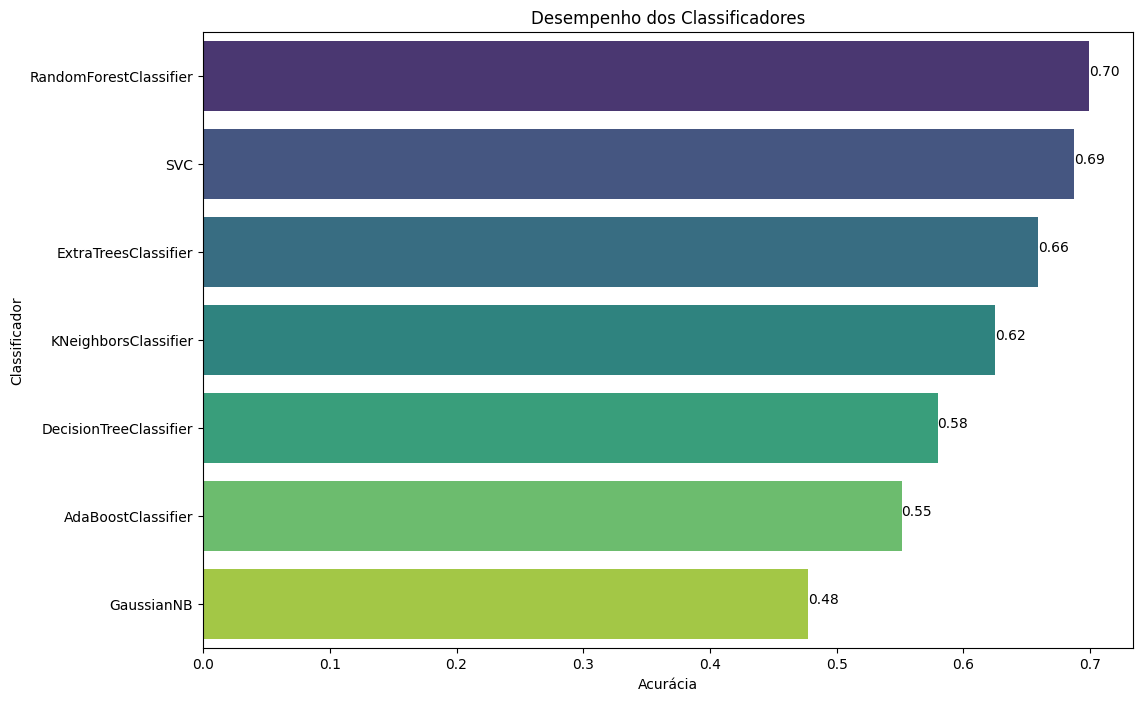

In [27]:

resultados_df = pd.DataFrame(resultados, columns=['Classificador', 'Acurácia', 'Recall', 'Precisão', 'F1-Score'])
resultados_df = resultados_df.sort_values(by='Acurácia', ascending=False)
print(resultados_df.head(7))

plt.figure(figsize=(12, 8))
sns.barplot(x='Acurácia', y='Classificador', data=resultados_df, palette='viridis')
for index, value in enumerate(resultados_df['Acurácia']):
    plt.text(value, index, f'{value:.2f}')
plt.title('Desempenho dos Classificadores')
plt.xlabel('Acurácia')
plt.ylabel('Classificador')

plt.show()

# **Uma ideia de Projeto de Aplicação**


Apresente aqui uma ideia de projeto original em que a tecnologia/conceito explorada poderia ser empregada. Busque apresentar um problema relevante e atual. Você não precisa implementar mas, se quiser, pode empregar o Exemplo de Aplicação anterior para isso! Neste caso basta fazer um protótipo ou uma prova de conceito. Empregue aqui no máximo 1 página

A partir do treinamento e aprendizado supervisionado é possível aplicar uma previsão da partida, onde aw utilizando sw uma base de dados mais robusta e específíca dentro de um contexto de times profissionais de League of Legends, essa previsão pode funcionar como um insumo para times na montagem de composições de campeões que tem a maior chance de se obter uma vitória, ou até mesmo para identificar os campeões que são mais fortes na sua função.

Portanto, o exemplo abaixo demonstra como funcionaria a previsão e os dados que podem ser obtidos a partir dela, usando apenas os campeões como base de dados.


## Criação da nova partida a ser prevista pelo modelo

Criação da tabela das 10 novas partidas de exemplo, geradas aleatórimente, com o conjunto dos times e seus respectivos campeões.

In [45]:
new_match_df = pd.read_csv('https://raw.githubusercontent.com/L3borim/LoL-Match-Prediction-Project-IA2024S1/dev/new_matches.csv')

new_match_df.head()

Champion1_Blue Champion2_Blue Champion3_Blue Champion4_Blue Champion5_Blue  \
0         Xerath        Caitlyn       Vladimir        Orianna          Viego   
1        Evelynn          Senna           Bard           Sett            Jax   
2   Aurelion Sol          Teemo          Diana          Poppy       Pantheon   
3      Lissandra           Azir   Aurelion Sol           Sett         Illaoi   
4        Trundle         Syndra   Twisted Fate         Xerath       Aphelios   

    Champion1_Red Champion2_Red Champion3_Red Champion4_Red Champion5_Red  
0           Talon          Zyra        Thresh       Kalista         Riven  
1    Aurelion Sol       Kha'Zix       Camille        Illaoi         Talon  
2  Nunu & Willump      Renekton          Udyr         Jayce          Nami  
3          Twitch         Poppy     Gangplank          Gnar         Ivern  
4           Braum       Nidalee        Kennen  Fiddlesticks        Zilean

## Combinando os novos dados com os originais

Combinação do novo conjunto de dados com os dados orginais juntamente do encoding para garantir que todas os dados estejam no mesmo formato.

Além disso, já que está é uma predição, é definida uma variável `X_new` que corresponde as colunas do novo conjunto de dados apenas.

In [35]:
combined_df = pd.concat([df.drop('Result', axis=1), new_match_df], axis=0)

combined_df_encoded = pd.get_dummies(combined_df)

X_new = combined_df_encoded.tail(10)

## Resultado da Previsão

Uma vez que já se sabe qual modelo possui a melhor acurácia, é possível aplicar ele para o novo conjunto de dados para a previsão.

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

prediction = model.predict(X_new)

results = label_encoder.inverse_transform(prediction)

# Contar vitórias e derrotas
win_count = (results == 'Win').sum()
loss_count = (results == 'Loss').sum()
total = len(results)
win_percentage = (win_count / total) * 100
loss_percentage = (loss_count / total) * 100

# Criar um DataFrame para as previsões
predictions_df = new_matches_df.copy()
predictions_df['Prediction'] = results

# Mostrar a tabela de resultados
print(predictions_df)

# Criar um gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=['Win', 'Loss'], y=[win_percentage, loss_percentage], palette='viridis')
plt.title('Porcentagem de Vitórias e Derrotas das 10 Partidas Previstas')
plt.ylabel('Porcentagem')
plt.xlabel('Resultado')
plt.ylim(0, 100)
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Champion1_Blue_Aurelion Sol
- Champion1_Blue_Evelynn
- Champion1_Blue_Lissandra
- Champion1_Blue_Vel'Koz
- Champion1_Blue_Xerath
- ...


# **Referências**

Este é um item obrigatório.

# **Vídeo e GitHub**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e na solução empregada. Salve em um GitHub público seu projeto (o notebook Python).

# **Conclusão**

Apresente a conclusão do seu estudo. Indique limitações da tecnologia/conceitos, novos avanços e compare com tecnologias/conceitos concorrentes.



# **Apêndice**

Link da Apresentação no YouTube:


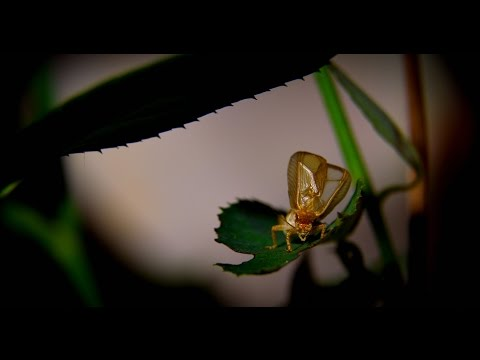

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [32]:
#@title **Avaliação**
Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 9 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 6 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 7 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}








In [33]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.4



tia                         nome  nota
0  10375711   GABRIEL MARQUES G. ALMEIDA   7.4
1  10390123         LEONARDO BORIM SILVA   7.4
2  10390316                  MATEUS YOON   7.4
3  10390484                  SAMY IDESIS   7.4